# Análise de agrupamento do World Happiness Report 2021

<p style="text-align: justify"> O objetivo desta análise foi realizar um agrupamento de países através dos dados do <a href="https://worldhappiness.report/ed/2021/"> World Report Happiness 2021 </a>. 

***

### Descrição dos dados

<p style="text-align: justify">O objetivo do relatório foi avaliar o impacto da Covid-19 sobre a qualidade de vida das pessoas e descrever como os governos de todo mundo lidaram com a pandemia. O relatório possui oito capítulos, sendo que os dados utilizados para essa análise foram apresentados no <a href="https://worldhappiness.report/ed/2021/happiness-trust-and-deaths-under-covid-19/"> capítudo 2 (Happiness, trust, and deaths under COVID-19)</a> e a tabela dos dados pode ser encontrada em **Appendices & Data** na seção *Data for figure 2.1*. Para informações sobre as variáveis utilizadas no relatório, é possível encontrar em **Appendices & Data** na seção *Statistical Appendix 1 for Chapter 2*.</p>  

***
    
### Referências

https://worldhappiness.report/ed/2021/


### Importando bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

%matplotlib inline

### Análise exploratória dos dados
***

In [2]:
df = pd.read_excel("DataForFigure2.1WHR2021C2.xls")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


##### Verificando tamanho do dataset

In [3]:
df.shape

(149, 20)

##### Verificando a existência de dados nulos

In [4]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

##### Verifiando o formato dos dados na tabela

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

##### Verificando os índices por região

In [6]:
df['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

#### Análise gráfica

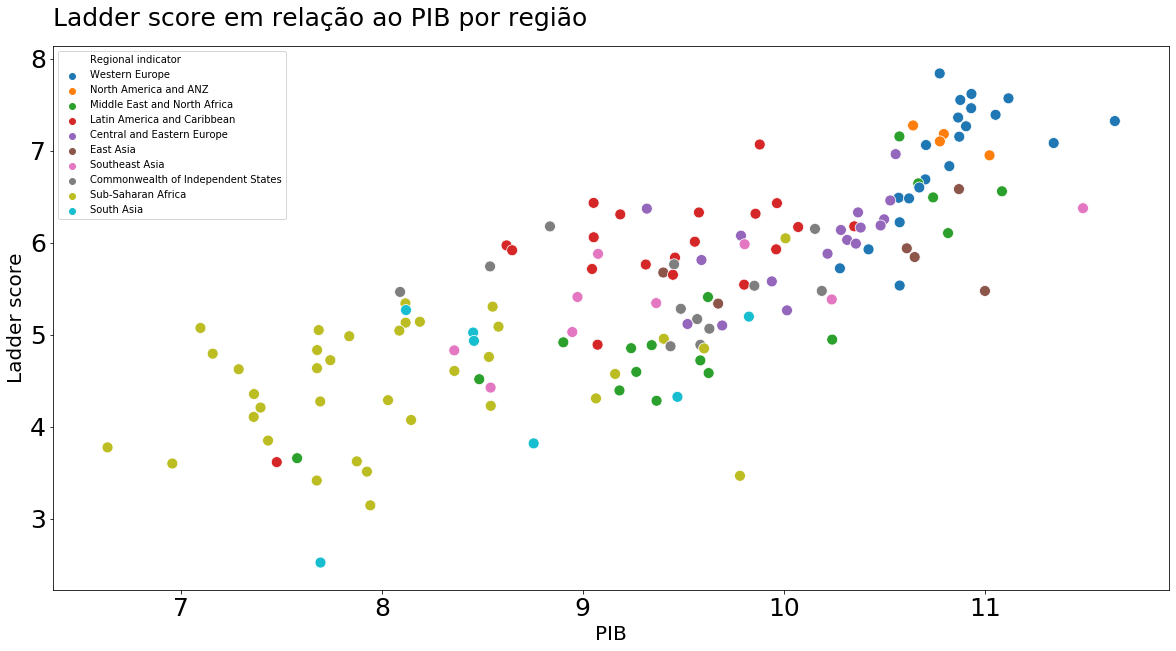

In [60]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Regional indicator',s=120,data=df)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)

##### Separando os dados por região

In [8]:
america_latina = df[df['Regional indicator'] == "Latin America and Caribbean"]

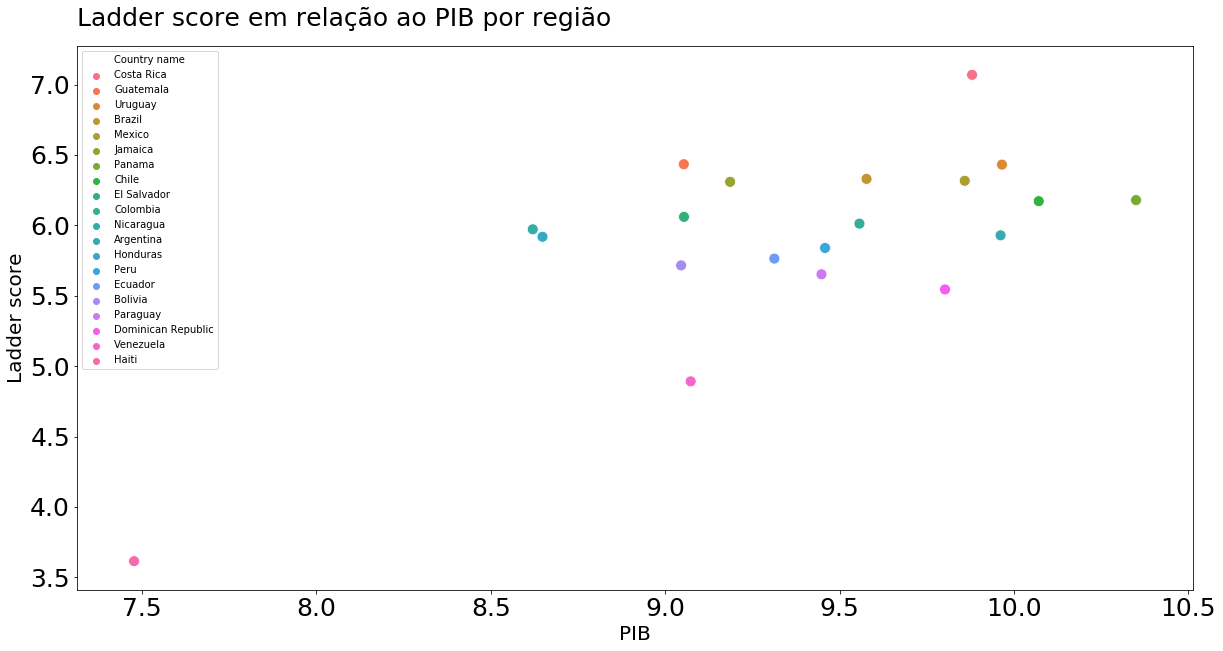

In [62]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Country name',s=120,data=america_latina)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)

In [10]:
selecao = (df['Regional indicator'] == "Western Europe") | (df['Regional indicator'] == "Central and Eastern Europe")
europa = df[selecao]

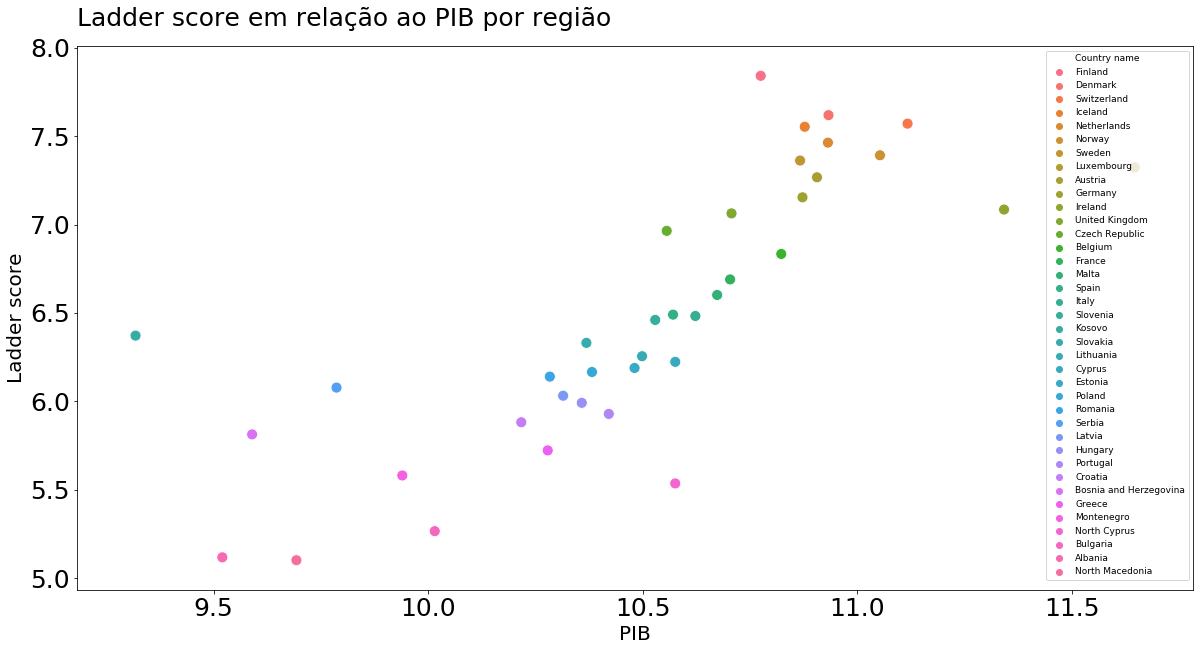

In [73]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Country name',s=120,data=europa)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)
ax.legend(fontsize=9,loc="best",)

In [12]:
selecao = (df['Regional indicator'] == "Middle East and North Africa") | (df['Regional indicator'] == "Sub-Saharan Africa")
africa_om=df[selecao]


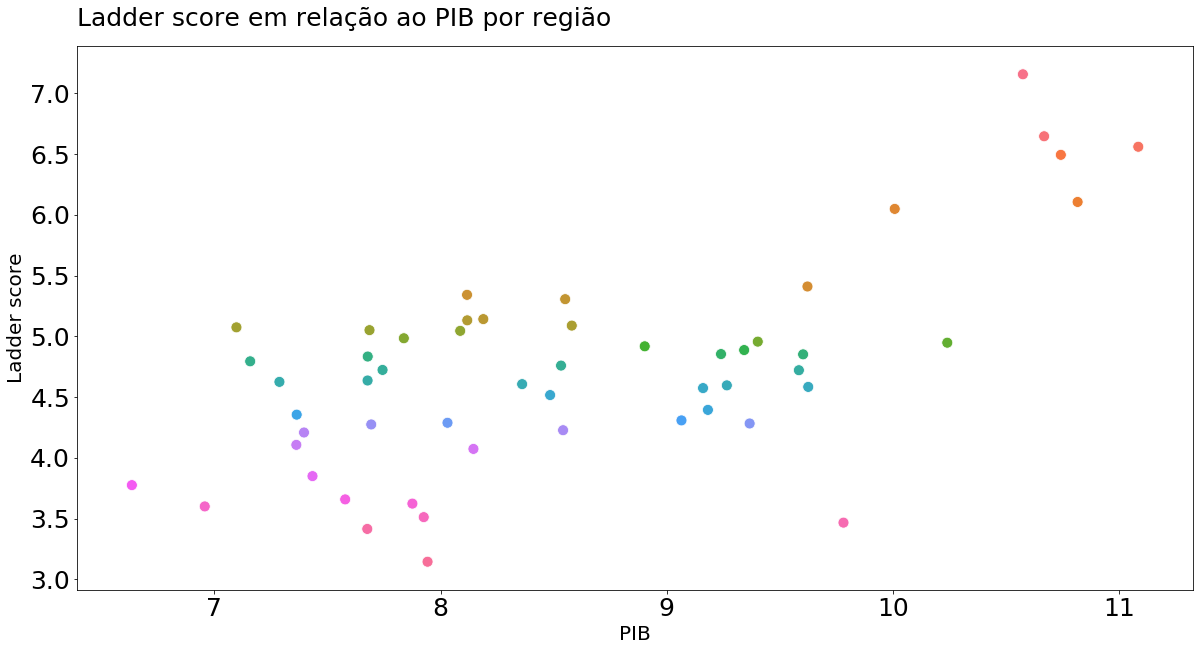

In [77]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Country name',s=120,data=africa_om)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)
legend = ax.legend(fontsize=9,loc="best")
legend.remove()

In [14]:
selecao = (df['Regional indicator'] == 'East Asia') | (df['Regional indicator'] == 'Southeast Asia') | (df['Regional indicator'] == 'South Asia')
asia=df[selecao]

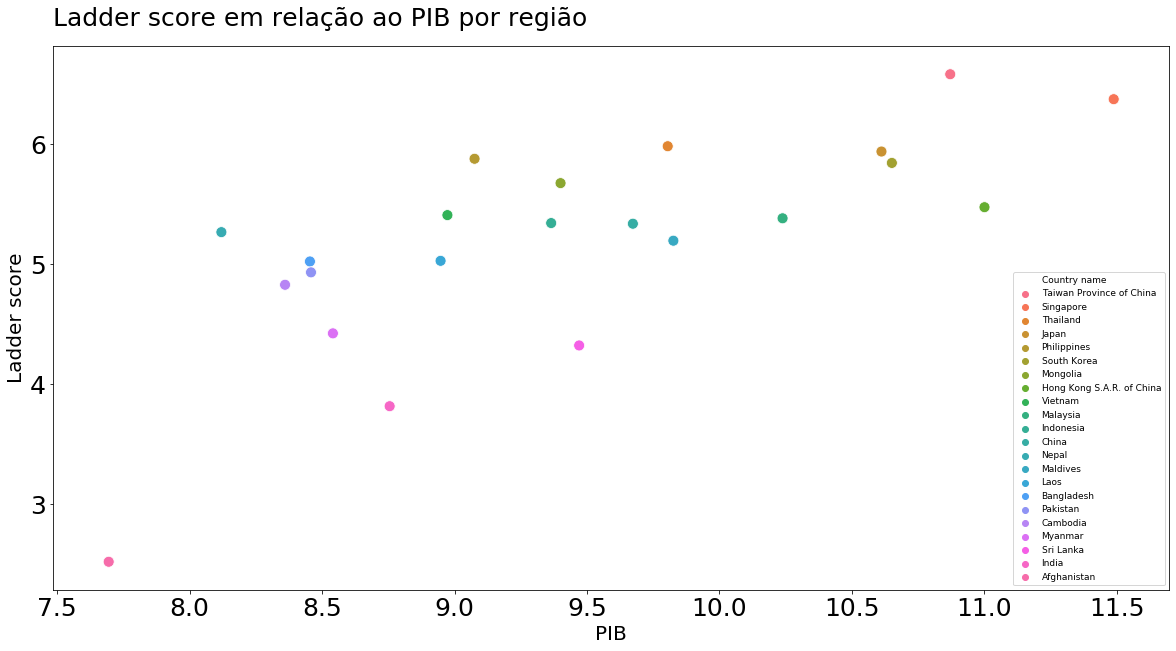

In [80]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Country name',s=120,data=asia)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)
ax.legend(fontsize=9,loc="lower right")

In [16]:
america_norte_ocean = df[df['Regional indicator'] == 'North America and ANZ']

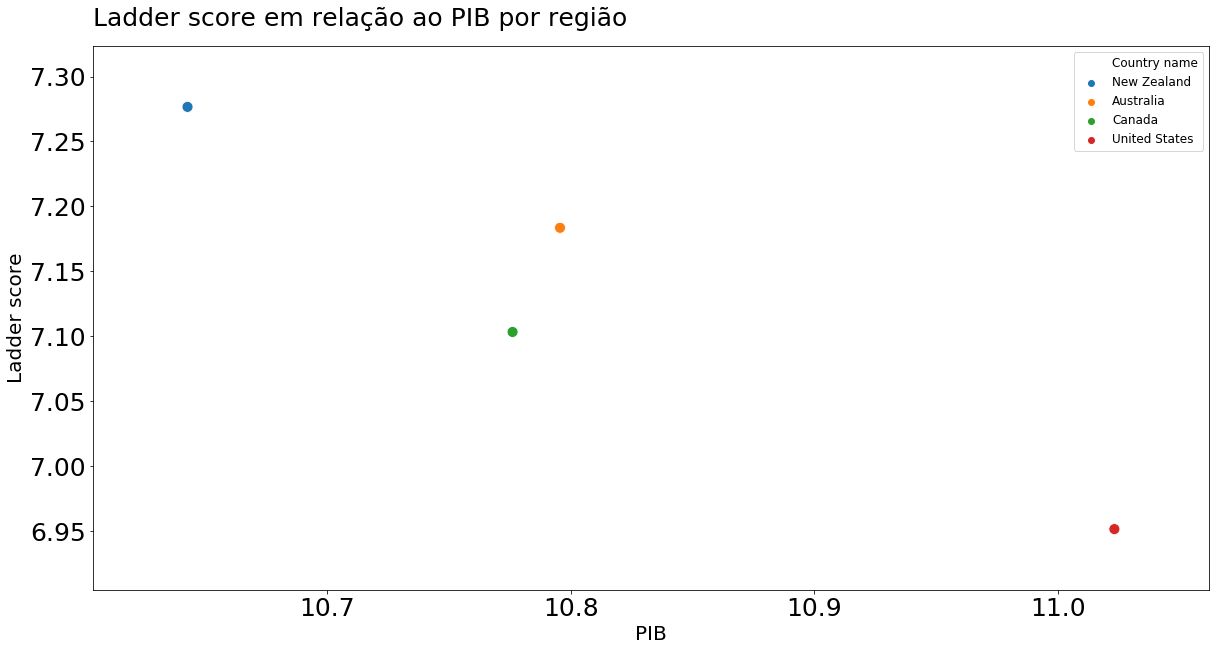

In [82]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Country name',s=120,data=america_norte_ocean)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)
ax.legend(fontsize=12,loc="best")

In [18]:
com_indep = df[df['Regional indicator'] =="Commonwealth of Independent States"]

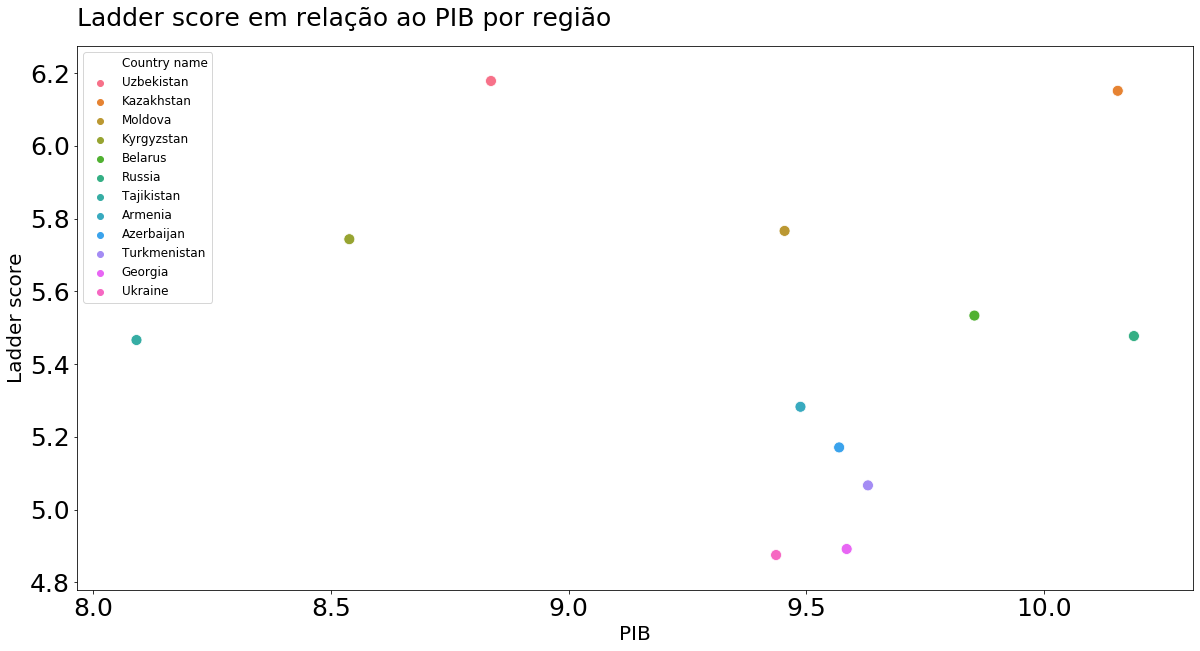

In [84]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Country name',s=120,data=com_indep)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)
ax.legend(fontsize=12,loc="best")

### Análise de agrupamento

Para análise de agrupamento, foi utilizado somente as variáveis *Country name, Regional indicator, Ladder score, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption*. 

***

In [20]:
#Selecionando o dataset
agrup = df[["Country name","Regional indicator","Ladder score","Logged GDP per capita","Social support","Healthy life expectancy",
           "Freedom to make life choices","Generosity","Perceptions of corruption"]]
agrup.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938


### Agrupamento por K-means

<p style="text-align: justify">Essa técnica divide os dados em diferentes grupos, onde os registros dentro de cada grupo são mais semelhantes uns aos outros. Dessa maneira, os países que sejam mais semelhantes entre si dentre as variáveis selecionadas estarão dentro do mesmo grupo. </p>

***


In [21]:
#Retirando as colunas não númericas do dataset
y=agrup.drop(['Country name',"Regional indicator"], axis =1)
y

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938
...,...,...,...,...,...,...,...
144,3.5118,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377
145,3.4665,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619
146,3.4147,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801
147,3.1448,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999


##### Normalização das variáveis

<p style="text-align: justify">Como existem variáveis com escalas grandes, é aconselhável normalizar os dados a fim de imperdir que essa variáveis dominem o processo de agrupamento. Segue abaixo a normalização:</p> 

In [22]:
y=StandardScaler().fit_transform(y)

In [23]:
y

array([[ 2.15756434,  1.16307536,  1.21283894, ...,  1.39636049,
        -0.55020339, -3.03157509],
       [ 1.94958776,  1.2998862 ,  1.21987923, ...,  1.36422368,
         0.30142509, -3.0707957 ],
       [ 1.90474074,  1.45940223,  1.10924973, ...,  1.12647041,
         0.26492945, -2.43910482],
       ...,
       [-1.97898374, -1.52083235, -2.29147625, ...,  0.93140173,
         0.50400565, -3.13817083],
       [-2.2311531 , -1.29005408, -0.56116252, ..., -1.01716074,
        -0.21443476,  0.52345072],
       [-2.81219808, -1.50473118, -3.07522299, ..., -3.62888543,
        -0.57633296,  1.10185365]])

##### Aplicando o modelo

In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(y)

KMeans(n_clusters=3)

#####  Verificando classificação dos grupos

In [25]:
labels = kmeans.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 2 2 2 2 1 1 2 2 2 2 2
 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 0 0 2 0 2 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 2 2 0 0 2 2 2 2 0
 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0]


In [88]:
agrup['Clusters'] = labels
agrup.head(50)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Clusters
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,1
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,1
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,1
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,1
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,1
5,Norway,Western Europe,7.3925,11.053126,0.954445,73.300011,0.959588,0.093426,0.270028,1
6,Sweden,Western Europe,7.3627,10.866995,0.933805,72.700050,0.944604,0.086223,0.237460,1
7,Luxembourg,Western Europe,7.3244,11.646564,0.907790,72.599998,0.907180,-0.033566,0.386419,1
8,New Zealand,North America and ANZ,7.2766,10.642713,0.948148,73.400146,0.928580,0.134256,0.241641,1
9,Austria,Western Europe,7.2678,10.906316,0.934176,73.299721,0.907691,0.041568,0.481378,1


**<p style="text-align: justify">Como pode ser observado o grupo de países classificados como "1" foram os países melhor colocados no ranking, enquanto que o grupo classificado como "0" foram os que estiveram em sua maioria mais abaixo no ranking. O grupo de países com valor "2" estão localizados no meio do ranking, assim, será mudado o rótulo do agrupamento para alto(valor 0), baixo(valor 1) e médio(valor 2) para melhor entendimento.</p>**

In [91]:
agrup["Clusters"].replace([0,1,2],["Baixo","Alto","Médio"], inplace=True)
agrup

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Clusters
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,Alto
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,Alto
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,Alto
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,Alto
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,Alto
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.5118,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,Baixo
145,Botswana,Sub-Saharan Africa,3.4665,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,Médio
146,Rwanda,Sub-Saharan Africa,3.4147,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,Baixo
147,Zimbabwe,Sub-Saharan Africa,3.1448,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,Baixo


### Análise por grupo
***

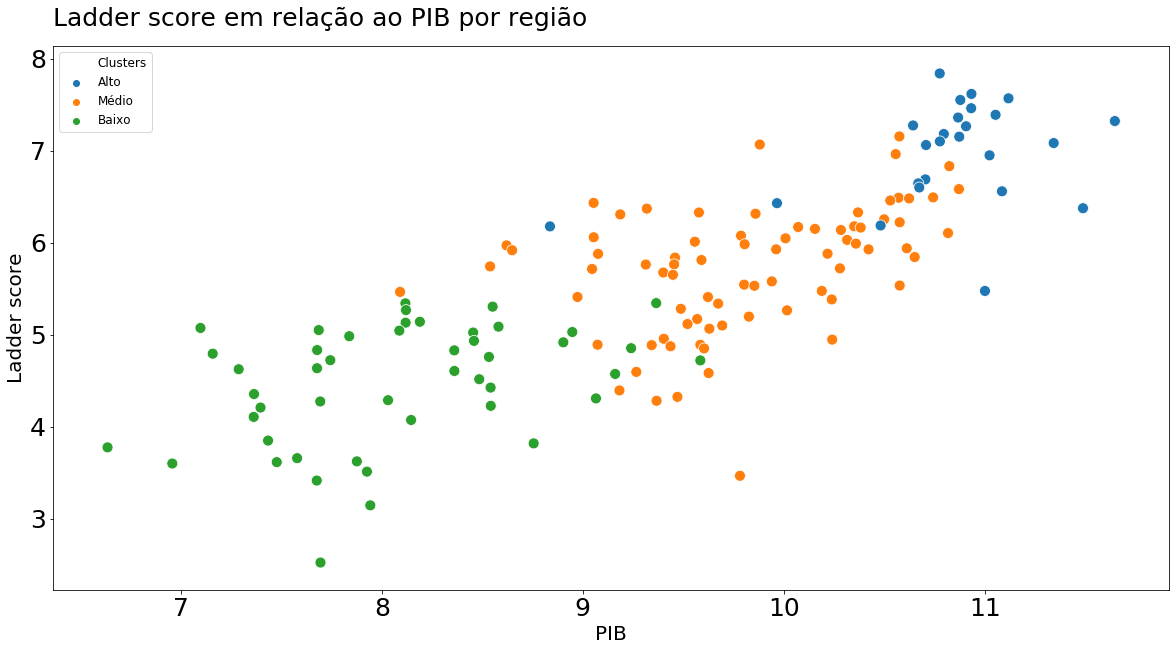

In [92]:
ax=sns.scatterplot(x='Logged GDP per capita',y='Ladder score',hue='Clusters',s=120,data=agrup)
#Colocando título do gráfico, tamanho da fonte e distância do título para o gráfico(pad)
ax.set_title('Ladder score em relação ao PIB por região', fontsize=25, pad=20, loc="left")
#Nomeando o eixo 'X' e escolhendo o tamanho da fonte
ax.set_xlabel("PIB",fontsize=20)
#Nomeando o eixo 'Y' e escolhendo o tamanho da fonte
ax.set_ylabel("Ladder score",fontsize=20)
#Aumentando o tamanho dos rótulos do gráfico
ax.tick_params(axis='x',labelsize = 25)
ax.tick_params(axis='y',labelsize = 25)
ax.tick_params(labelsize = 25)
#Definindo o tamanho da figura
ax.figure.set_size_inches(20,10)
ax.legend(fontsize=12,loc="best")

##### Analisando os grupos individualmente

In [93]:
alto = agrup[agrup["Clusters"] == "Alto"]
alto

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Clusters
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,Alto
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,Alto
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,Alto
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,Alto
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,Alto
5,Norway,Western Europe,7.3925,11.053126,0.954445,73.300011,0.959588,0.093426,0.270028,Alto
6,Sweden,Western Europe,7.3627,10.866995,0.933805,72.700050,0.944604,0.086223,0.237460,Alto
7,Luxembourg,Western Europe,7.3244,11.646564,0.907790,72.599998,0.907180,-0.033566,0.386419,Alto
8,New Zealand,North America and ANZ,7.2766,10.642713,0.948148,73.400146,0.928580,0.134256,0.241641,Alto
9,Austria,Western Europe,7.2678,10.906316,0.934176,73.299721,0.907691,0.041568,0.481378,Alto


In [94]:
alto.describe().round(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,6.97,10.81,0.93,72.12,0.91,0.06,0.43
std,0.56,0.52,0.03,2.73,0.05,0.11,0.17
min,5.48,8.84,0.84,65.26,0.72,-0.15,0.08
25%,6.60,10.70,0.92,72.00,0.90,0.01,0.29
50%,7.10,10.87,0.93,72.60,0.91,0.08,0.44
75%,7.36,11.02,0.94,73.40,0.93,0.13,0.57
max,7.84,11.65,0.98,76.95,0.97,0.31,0.72


In [95]:
a = pd.DataFrame(alto["Regional indicator"].value_counts())
a.reset_index(inplace=True)
a.columns=["Regional indicator","Número de Países"]
a['Total(%)'] = ((a["Número de Países"] * 100) / 39).round(2)
a

,Regional indicator,Número de Países,Total(%)
0,Western Europe,14,35.90
1,North America and ANZ,4,10.26
2,Middle East and North Africa,2,5.13
3,Commonwealth of Independent States,1,2.56
4,East Asia,1,2.56
5,Southeast Asia,1,2.56
6,Central and Eastern Europe,1,2.56
7,Latin America and Caribbean,1,2.56


<p style="text-align: justify">Um total de 25 países foram classificados como alto segundo a análise.O Ladder score médio desses países foi de 6.97, expectativa média de vida de 72 anos e a percepção de corrupção média de 0.43. Quase metade dos países (46.16%) estão localizados na Europa Ocidental, América do Norte ou Oceania. Nesse grupo vale destacar o Uruguai como o único país da América Latina pertencente a esse grupo.</p>

In [96]:
medio = agrup[agrup["Clusters"] == "Médio"]
medio

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Clusters
11,Israel,Middle East and North Africa,7.1571,10.574758,0.939231,73.503258,0.800027,0.030682,0.753111,Médio
15,Costa Rica,Latin America and Caribbean,7.0694,9.879919,0.891308,71.399925,0.934432,-0.126469,0.808753,Médio
17,Czech Republic,Central and Eastern Europe,6.9647,10.556147,0.946502,70.806648,0.858413,-0.208342,0.867781,Médio
19,Belgium,Western Europe,6.8340,10.823075,0.905531,72.199425,0.783322,-0.153368,0.645584,Médio
23,Taiwan Province of China,East Asia,6.5844,10.870996,0.898279,69.599998,0.784361,-0.070494,0.721331,Médio
...,...,...,...,...,...,...,...,...,...,...
122,Lebanon,Middle East and North Africa,4.5838,9.625673,0.847809,67.355217,0.525221,-0.073466,0.898123,Médio
126,Jordan,Middle East and North Africa,4.3946,9.182105,0.766824,67.000305,0.755277,-0.166789,0.704657,Médio
128,Sri Lanka,South Asia,4.3250,9.470400,0.826506,67.299210,0.841443,0.078830,0.863081,Médio
131,Egypt,Middle East and North Africa,4.2827,9.366633,0.749777,61.997715,0.748563,-0.182114,0.794778,Médio


In [97]:
medio.describe().round(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,5.72,9.81,0.86,67.54,0.80,-0.08,0.80
std,0.69,0.60,0.06,3.57,0.09,0.12,0.10
min,3.47,8.09,0.67,56.90,0.48,-0.29,0.51
25%,5.28,9.44,0.82,65.70,0.75,-0.16,0.74
50%,5.84,9.79,0.86,67.30,0.81,-0.10,0.82
75%,6.17,10.31,0.90,69.59,0.87,-0.03,0.87
max,7.16,10.87,0.98,75.10,0.95,0.29,0.94


In [98]:
m=pd.DataFrame(medio["Regional indicator"].value_counts())
m.reset_index(inplace=True)
m.columns=["Regional indicator","Número de Países"]
m['Total(%)'] = ((m["Número de Países"] * 100) / 67).round(2)
m

,Regional indicator,Número de Países,Total(%)
0,Latin America and Caribbean,18,26.87
1,Central and Eastern Europe,16,23.88
2,Commonwealth of Independent States,11,16.42
3,Middle East and North Africa,10,14.93
4,Western Europe,7,10.45
5,East Asia,5,7.46
6,Sub-Saharan Africa,4,5.97
7,Southeast Asia,4,5.97
8,South Asia,2,2.99


<p style="text-align: justify">Um total de 77 países foram classificados como médio. O Ladder score médio desses países foi de 5.72, expectativa média de vida de 67 anos e a percepção de corrupção média de 0.80. Metade dos países (50.75%) estão localizados na América Latina ou Europa Central e Oriental. Nesse grupo vale destacar a Costa Rica como o país com os melhores indices avaliados.</p>

In [99]:
baixo = agrup[agrup["Clusters"] == "Baixo"]
baixo

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Clusters
81,Indonesia,Southeast Asia,5.3445,9.364791,0.811411,62.236362,0.872877,0.541553,0.867314,Baixo
82,Congo (Brazzaville),Sub-Saharan Africa,5.3417,8.117217,0.636479,58.220947,0.694734,-0.067540,0.744673,Baixo
84,Ivory Coast,Sub-Saharan Africa,5.3060,8.551093,0.644098,50.113598,0.741463,-0.016492,0.794468,Baixo
86,Nepal,South Asia,5.2689,8.120031,0.774381,64.232788,0.782475,0.152013,0.727497,Baixo
90,Cameroon,Sub-Saharan Africa,5.1418,8.189097,0.709608,53.515312,0.731207,0.025644,0.847627,Baixo
91,Senegal,Sub-Saharan Africa,5.1318,8.118176,0.710232,59.801552,0.695216,-0.046003,0.800758,Baixo
94,Ghana,Sub-Saharan Africa,5.0884,8.580243,0.726757,57.586346,0.806505,0.123355,0.848191,Baixo
95,Niger,Sub-Saharan Africa,5.0741,7.097615,0.641138,53.780006,0.806124,0.018450,0.692541,Baixo
97,Gambia,Sub-Saharan Africa,5.0510,7.685918,0.689622,55.160160,0.697048,0.424155,0.745968,Baixo
98,Benin,Sub-Saharan Africa,5.0452,8.086959,0.488511,54.712749,0.757485,-0.033809,0.660715,Baixo


In [100]:
baixo.describe().round(2)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,4.47,8.08,0.69,57.03,0.72,0.05,0.76
std,0.65,0.67,0.09,4.36,0.11,0.17,0.12
min,2.52,6.64,0.46,48.48,0.38,-0.24,0.17
25%,4.09,7.68,0.63,54.43,0.65,-0.04,0.72
50%,4.63,8.09,0.71,57.12,0.72,0.04,0.79
75%,5.00,8.54,0.76,59.55,0.78,0.10,0.84
max,5.34,9.58,0.83,66.30,0.96,0.54,0.92


In [101]:
b=pd.DataFrame(baixo["Regional indicator"].value_counts())
b.reset_index(inplace=True)
b.columns=["Regional indicator","Número de Países"]
b['Total(%)'] = ((b["Número de Países"] * 100) / 43).round(2)
b

,Regional indicator,Número de Países,Total(%)
0,Sub-Saharan Africa,32,74.42
1,South Asia,5,11.63
2,Middle East and North Africa,5,11.63
3,Southeast Asia,4,9.30
4,Latin America and Caribbean,1,2.33


<p style="text-align: justify">Um total de 47 países foram classificados como médio. O Ladder score médio desses países foi de 4.47, expectativa média de vida de 57 anos e a percepção de corrupção média de 0.76, valores bem abaixo dos outros dois grupos. Além disso, 32 países (74.42%) estão localizados na África subsaariana. Nesse grupo vale destacar o Afeganistão como país com os piores indices avaliados.</p>

##### Avaliando o agrupamento

<p style="text-align: justify">Além da utilização do K-means é importante avaliar dissimilaridade dos grupos, ou seja, o quanto um grupo é diferente do outro. Para isso, a técnica de silhouette é utilizada na avaliação. Logo, quanto mais próximo de 1 for o valor de silhouette, maior será a dissimilaridade entre grupos. Segue abaixo a análise:</p>

In [102]:
silhouette = metrics.silhouette_score(y,labels, metric = "euclidean")
print(silhouette)

0.31508025061380646


##### Considerações finais

<p style="text-align: justify">A partir da análise foi possível agrupar os países do World Happiness Report 2021 em categorias (alto, médio e baixo) de acordo com variáveis utilizadas no relatório. Dessa maneira, pode ser visto que países localizados na Europa Ocidental e America do Norte possuíam altos índices de bem estar quando comparados a países da África subsaariana onde foram encontramos a maioria dos países com os piores índices. Vale destacar que essa análise de classificação pode permitir uma previsão de classificação de países em anos futuros através de técnicas de Machine Learning.</p>